# **OOP-based Python Game Development**

---

By Jean-Yves Tran | jy.tran@[datascience-jy.com](https://datascience-jy.com) | [LinkedIn](https://www.linkedin.com/in/jytran-datascience/)  
IBM Certified Data Analyst 

---

Source: 
- [Object Oriented Python](https://www.packtpub.com/product/object-oriented-python-video/9781836204473) - by ACI Learning - Packt Publishing
- [Python 3.12 Official Docs](https://docs.python.org/3/)
---

The interactive links in this notebook are not working due to GitHub limitations. View this notebook with the interactive links working [here](https://nbviewer.org/github/jendives2000/Data_ML_Practice_2025/blob/main/1-3-SQL/practice/DuckDB/notebooks/4_duckdb_handson_eda.ipynb).

---

This is a practice project where I dive into Object Oriented Programming in Python 3 and use its features to create a very simple text-based game. 

- **HOW TO READ THIS:**  
  Because this notebook cannot be the game app itself, I will describe and show the code here in it and the actual game app code, a python file, will be populated with every code given here.  
  To facilitate the reading, whenever necessary, I will add a reference to the notebook as a comment in the game app file. 


- **HOW TO USE THIS:**  
  So you know now that the code in this notebook is not building the app, and as such it's of no use to run it as is.  
  The code in the app file is the one to run. 
  So, follow along if you want to know every detail and my chain of thought.  
  I suggest you to try to build that python app file yourself, that is if you want to learn by practicing.  
  Otherwise, the app file will likely be complete and ready by the time you read this, so you will not be able to run snippets of it like I do when I make test runs and show the output. 


For this notebook, I will:


<u>**OUTLINE:**</u>  
This notebook is made of 


<u>**The main 2 takeaways:**</u>:


---


## **Game Design Decisions**:

- **Game Type & Structure:**
  The game is a text-based hack-and-slash where players engage in **turn-based** combat. The engine is intentionally minimal to start—essentially a **basic framework built with object-oriented principles**.

- **Iterative Design Process:**
  I plan to develop the game in **iterations**, starting with a very simple version (think “Version 0.001”) that will later evolve by **adding complexity**. This approach ensures that even if the full project seems overwhelming, it begins with a manageable, incremental process.

- **Core Game Elements:**
    - **Player**: The player character will have **key attributes** such as a name and a level. The level will directly **influence** their attack power, reinforcing the connection between progression and combat effectiveness.
    - **Enemy**: The adversary is a generic monster, designed to be a **simple yet flexible opponent** that can be **expanded** upon in future iterations.
  
- **Game Flow & Options:**
  At the **start**, players experience an introductory text (a nod to classic “Magic The gathering" trading card game). When an enemy appears, players are given a set of options:
  - **Attack**: Engage directly with the enemy.
  - **Run**: Exit the encounter, which includes a brief delay to emphasize the action.
  - **Pass**: Skip the turn, a choice that might still leave the player vulnerable to enemy attacks or even lead to facing a different foe.

- **Inspiration & Vision:**
  The design decisions draw heavily from classic video game experiences, ensuring that even this simplified game **reflects thoughtful gameplay mechanics and a clear, iterative developmental path**.

---


## **Defining the Player Class**:

I will declare Classes in the file `actors.py`.

Each actor will then be an object derived from the Player Class, which has to have: 
- a level
- a name

So, my class here is the `Player` class, which I will use to create each new Actor.
I am defining that class now: 

In [1]:
# find this in the actors.py file with this comment: # I
class Player: 
    def __init__(self, name, level) -> None:
        self.name = name
        self.level = level

    # adding a print-out function 
    def __repr__(self) -> str:
        return ('<Player: {} at Level {}>'
                .format(self.name,
                        self.level))

The `__repr__` function will print out the name and level of any called upon Player.  
This is convenient as it is confirming each new instantiation. 

### **Adding the Attack**: 

For the attack I do **not want a generic attack** that deals a definite amount of damage, I want something **less predictable**.  

For that I use the module `random` and the function `randint` (imported at the top of that same file) to make that damage completely random, within a range that I specify. 

In [ ]:
# I-1
def get_attack_power(self):
        return randint(1, 100) * self.level

The little math there is as simple as it looks.  
The random number is picked from 1 to 100 and it is multiplied by the level of the Player.  
This is a nice way to add that **progress aspect** in the attack method.  

## **Defining the Enemy Class**: 

Enemies are slightly different from Players, I want them:
- to have a **kind** (Ooze, Ogre, Dragon, Elf, Human, etc)
- and also have a **level**

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

## **Creating New Player & Enemy**: 

My 2 classes are defined and ready to go:

In [ ]:
# A1
player_1 = Player(name='Chandra', level=1)
ogre_1 = Enemy(kind='Ogre', level=1)
player_1, ogre_1

(<Player: Chandra at Level 1>, <Enemy: Ogre at lvl 1>)

### `if __name__ == "__main__":`

Before I run the previous code snippet, I added this line: 
`if __name__ == "__main__":`

This ensures that **only the code in that same python file** is executed. It prevents it from being executed if the file is moved to another app.  It's a good practice to add it if you want to test run code. 

Ok, the app file is ready for a small run test, let's add 2 prints to check if everything was well executed: 

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())

### **First test run**:

Just below is what it outputs.

The new player and enemy were created according to my classes. I see the values that I assigned to each.

The number "**91**" is the attack damage.  Because I used `randint` that number has to change every time I run the code.  Which was the case.  
Let's not forget that that **damage is multiplied by the level** number of that player too. Here it was just level 1. 

So all is fine so far.

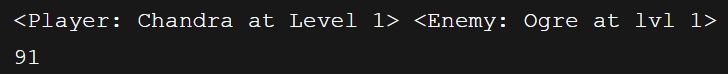

## **Adding Attack to the Enemy Class**: 

What's the point of an encounter if the enemy can't even attack, right? 
Let's add that same attack attribute that I added to the Player class:

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

    # II-1
    def get_attack_power(self):
            return randint(1, 100) * self.level

And print it out:

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())
    # A1b
    print(ogre_1.get_attack_power())

Of course I got the same output for my player and enemy but now I see the ogre damage too: "**5**". 

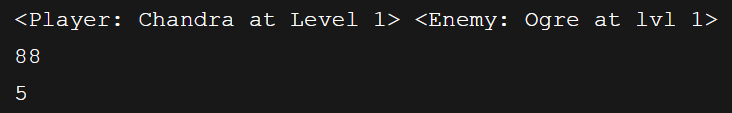

## **The main App: game.py**:

The file `actors.py` is not the game app itself, I coded there my classes. 

For the game app itself, I'm naming it `game.py`. I know, very original. 
Following what I decided for the game design, I want to add:
- an intro that will be printed every time the game starts and resets
- and a play function to actually start the game

So the file is in the folder `../app`. 

### **main() & print_intro()**:

Here's the code of the first two functions I want to add:

In [ ]:
# G-I
def main():
    print_intro()
    play()

def print_intro():
    print(
    """
    ==== Magic The Quickening ====
    A Super Duper Fast 1 Combat Text Game!
    
        [Press Enter to Continue]
    """
    )
    input()

Let's unwrap that.  
The first function triggers the 2 functions I want. 

Just under it I declare one of these functions that is printing that intro 'splash screen'.  
**Without** the `input()` function there, the user would **not be able** to press enter, the prompt would just return to idle state. 

### **import classes & play()**:
I now add the second function, `play()`, which starts the game.  
But I need a player and an enemy, without both of them the game cannot happen. 

For that, I need to import the classes I defined earlier in game.py:

In [ ]:
# import A
from actors import Player, Enemy

I can use them now in the play() function:

In [ ]:
# G-Ib
def play():
    enemies =[
        Enemy('Bear', 1),
        Enemy('Wurm', 1)
    ]
    player = Player('Jace', 1)
    
    print(enemies)
    print(player)

if __name__ == '__main__':
    main()

So I added 2 enemies from the Class Enemy and 1 player from the Class Player and I printed them out to help me confirm them.  

The last 2 lines are similar to what I added at the end of the actors.py file. The code in that game.py file will only be executed from within it.  

I can test run it:

### **Test Run**:
I see my intro 'splash screen' and I had to press Enter to get the rest of the print outs:  

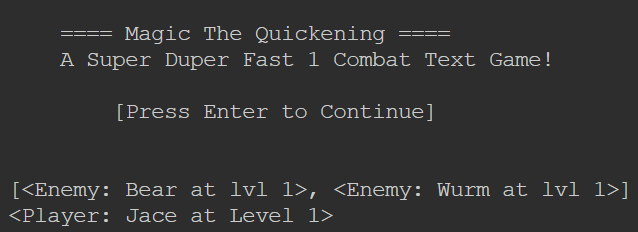

However the **game just stops there** and gets back to the terminal prompt.  
It **should continue** to run and give me the choices I decided to implement: attack, run and pass. 

### **while loop: run, attack, pass**:
I am adding the new logic under the comment # G-Ic:

In [ ]:
# G-Ib
def play():
    enemies = [Enemy("Bear", 1), Enemy("Wurm", 1)]
    player = Player("Jace", 1)

    # G-Ic
    while True: 
        next_enemy = random.choice(enemies)
        cmd = input(f'You see a {next_enemy.kind}. [r]un, [a]ttack, [p]ass?')
        
        if cmd == 'r':
            print("run")
        elif cmd == 'a':
            print("attack")
        elif cmd == 'p':
            print("pass")

`while True:` is very useful to **keep a loop going on** until a condition is met. Here the condition is pressing a key. But actually there is no way out of the loop, except for the generic CTRL + C. 

In this game, this loop will be ended anyway whenever the user wins, and every one wins.

Line 8 introduces a new module, `random` that does what it is named after, randomizing from the list inside the variable `enemies`. For now it does not a lot as there are only 2 enemies in there.  
I imported that module at the top of the game.py file (# import B)

Line 9 is that input method again that is waiting for the user to make a choice among 3 keys to type: [r], [a], [p]. 

Let's test run this:

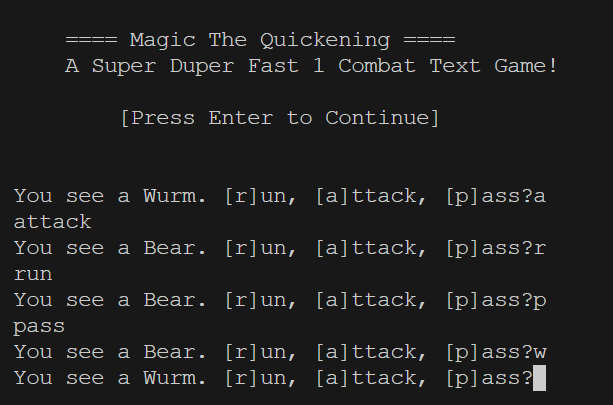

Up until I pressed '**w**' everything ran as expected.  

Just like I mentioned before, the game does not give us a way to exit the loop of that `while true:` statement. So **any other key just keeps the game running**. 

What I need here is a **"catch-all" prompt** prompting whenever any other key is typed. Here it is, added after the last elif statement of that previous code I added: 

In [ ]:
# G-Id
        else:
            print("Please choose a valid option")

Now I see that print whenever I press any other key, like g: 

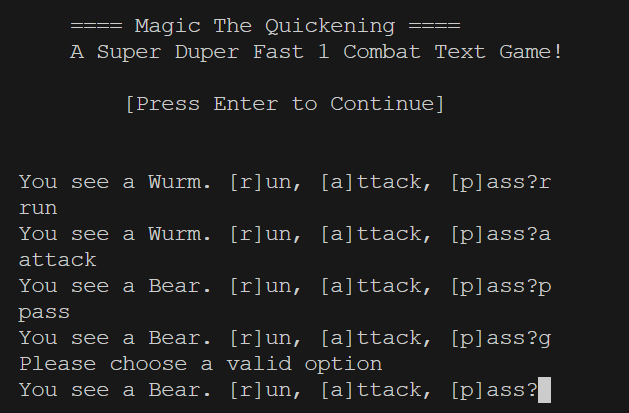

### **Better looks**:
The way the output looks is too dry to my taste. Also, the print is too minimal.  

I am adding the following: 

In [ ]:
# G-Ic
    while True:
        next_enemy = random.choice(enemies)
        cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")

        if cmd == "r":
            print(f"\n{player.name} runs away!")
        elif cmd == "a":
            print(f"\n{player.name} swings at {next_enemy.kind}!")
        elif cmd == "p":
            print(f"\npassing... Plan your next move!")
        # G-Id
        else:
            print("\nPlease choose a valid option")
            
        print()
        print('*'*40)
        print()

I changed the print of each action, line 7, 9 and 11. I added a line jump too.    
The three prints at lines 16 to 18 are jumping lines and in between is a bar made of 40 asterisks.  

The output below here is a lot more readable, the text and the layout 'breathe' better, it is more pleasing to the eyes:

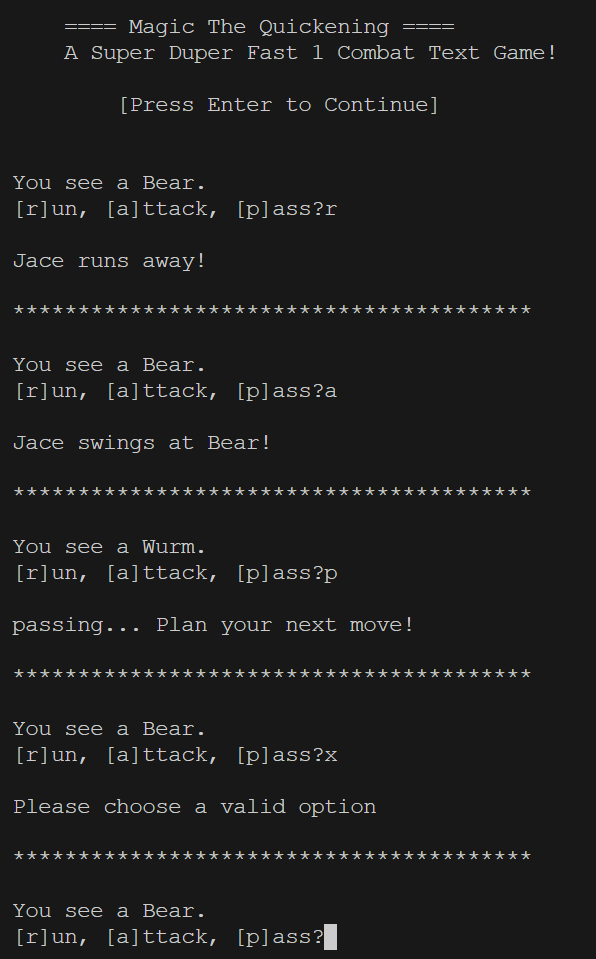

### **More attack logic**:
For now I am happy with what run and pass do, but for attack this is not enough. More logic is needed, I do not want the game to just print out who attacks what, there needs to be **an outcome out of each encounter**. 

That outcome can be: 
- a **win** for the user,
  - and in that case, the enemy encountered is **removed** from the list of encounters (`enemies`)
- or a **lose**,
  - and if so I just say that that player is **hiding**

So there will come a point where no enemies are left to encounter and in that case the user wins the game. 

I could go deeper into the logic but the approach here is to go with **small increments, test and improve**.  
That is what I did so far and this approach, while slower, is less prone to cascade into many little issues down the road as it is often the case when more complexity is injected. 

So I am back at the `while True:` section of the code modifying the attack part (commented # G-Ie, line 11 to 15): 

In [ ]:
    # G-Ic
    while True:
        next_enemy = random.choice(enemies)
        cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")

        if cmd == "r":
            print(f"\n{player.name} runs away!")
        elif cmd == "a":
            print(f"\n{player.name} swings at {next_enemy.kind}!")

            # G-Ie
            if player.is_attacking(next_enemy):
                enemies.remove(next_enemy)
            else:
                print(f"{player.name} hides to plan the next move")

        elif cmd == "p":
            print(f"\npassing... Plan your next move!")

If an attack is triggered, after the print out the user 'is attacking', the enemy is removed off its list, otherwise the user hides. 

### **Updating Class Player**:
Obviously I did not add this 'is_attacking" method to the Class `Player` (in the actors.py file), so this will break the code. I need to add that. 

In [ ]:
    # I-2
    def is_attacking(self, enemy):
        damage = self.get_attack_power()
        enemy_damage = enemy.get_attack_power()

        print(f"You dealt {damage}.")
        print(f"{enemy.kind} dealt {enemy_damage}!")

        if damage >= enemy_damage:
            print(f"You are victorious!")
            return True
        else:
            print(f"No...! {enemy.kind} defeated you!")

From the method `.get_attack_power()` I instantiate a player's damage, same for the enemy with `enemy_damage`.  

I print it out nicely for the user to get an instant feedback and know about it.  
And then I compare them and give an outcome accordingly. 

A test run ended up with the game breaking, giving me this error message: 
`IndexError: Cannot choose from an empty sequence`  
So what happened is that:
- I got defeated by the first Wurm, 
- then I defeated the second one, removing it from the list of encounters, 
- and then I defeated the Bear, also removing it, 
- which resulted in an empty list (because the list only has 2 enemies)

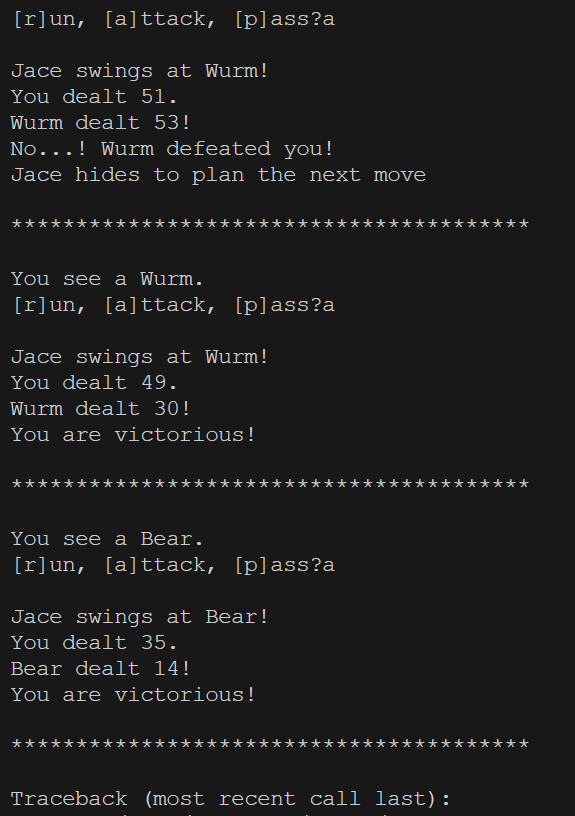

## **Game Ending Condition**:

So I need to add logic that will give to the user a feedback saying that he defeated all enemies and won, which will break out of the while loop instead of breaking the game.  

That new code has to go to the `game.py` file, at the end of `play()` method. 

In [ ]:
        # G-J
        if not enemies:
            print("You defeated all the enemies!\n\tCONGRATULATIONS!!!")
            break

Line 2 is equivalent to:
- if len(enemies) == 0:
  - meaning if the list of enemies is empty

Writing it with the `not` operator is just better. 

Another test run confirms the code is working properly: 

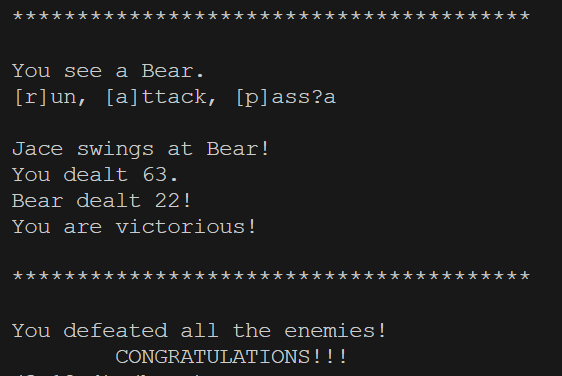

# **Turn the Game into a Class of its Own**: 

It's time to get a little more serious. I want the game to have **3 difficulty levels**, each with a different set of enemies.  

Instead of copying the same code again for each different difficulty level, I can **leverage the OOP** side of Python and make the **whole game a Class**. I will then be able to make a new object, a new level that is, with specific changes on the go. In other terms, I will use **inheritance** to make 3 games objects from a new class Game. 

So here I am in game.py, declaring this new class: 

In [ ]:
# I-a
class Game:
    def __init__(self, player, enemies) -> None:
        self.player = player
        self.enemies = enemies

Any new Game object has to have:  
- a player object
- and an enemies object

To test this out I need to create that new Game object at the bottom:

In [ ]:
if __name__ == "__main__":
    #main()
    player = Player(name="Gideon", level=1)
    enemies = [
               Enemy('Dragon', 1),
               Enemy('Soldier', 1)
               ]
    game = Game(player, enemies)
    print(f"\n{game}\n")

At line 2 I disabled the main() call so that I can run what I want to add below it. 

I instantiated a **new player and enemies objects** as well as a game object.  
The Game class has no play() method yet so I will just print it out. 


My terminal is confirming in the print out that game is indeed a Game object: 

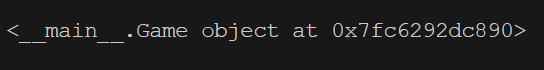

## **Any new player & enemies objects**:

To be sure that my new player and enemies list were indeed used by that game object I am going to print them out: 

In [ ]:
    print(f"\n{game}\n")
    print(f"{game.player}\n")
    print(f"{game.enemies}\n")

And indeed they were. So I can use any player and enemies objects, I am not limited by the previous ones.  

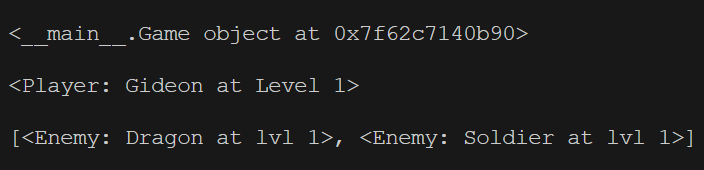

## **continuing: Encapsulation**: 

I still want the same intro and play method. I can just reuse the one I wrote earlier BUT because it is now a method of a class (and not just a function anymore), it needs the `self` argument:

In [ ]:
    # G-I
    def main(self):
        self.print_intro()
        #play()

Note that the block of code is now indented, of course, it is now part of the Game class. 

Line 2 I added the self argument and also right before the method print_info().  

Right there, what I just did is an example of an **encapsulation**. Which means that I added that function main() that is printing out an intro text, and that whole addition is part of the Game class. Rather complex **things are happening TOGETHER, bundled together** (encapsulated) instead of being gathered and put together from different files. 

Obviously I need to update the print_intro(_) method too, and all I did there was to add self as an argument (line 2):

In [ ]:
    # I-b
    def print_intro(self):
        print(
            """
        ==== Magic The Quickening ====
        A Super Duper Fast 1 Combat Text Game!
        
            [Press Enter to Continue]
        """
        )
        input()

And for the next test run I commented out the 2 previous print outs and just added a call to `game.main()`:

In [ ]:
    #print(f"{game.player}\n")
    #print(f"{game.enemies}\n")
    game.main()

The intro was printed out and I could press Enter, which as expected broke the game: 

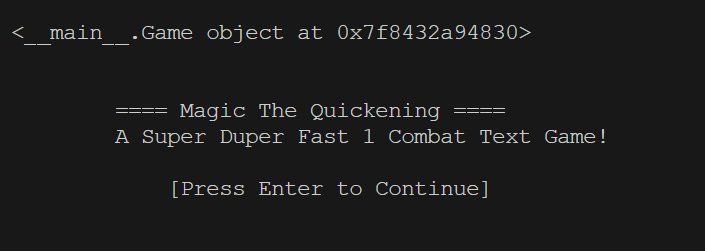

## **reimplementing play() in class Game()**:

To get the game actually starting I could just indent the whole play() method and add self as an argument. But this could lead to more bugs down the road, so let's play it safe and go slow. 

Originally I created player and enemies inside that play() function. Both are now already inside the game.py app, I just created them (2 new player and enemies objects). So they should consequently be within the scope of the whole Game class, and so within its play method too.  
That also means I do not need to create them there like I originally did.  

However, the whole `while True:` loop is still needed to keep the game running. 
I am just adding that random.choice again (line 4) on the enemies list to get a random encounter and test it out: 

In [ ]:
    # I-c
    def play(self):
        while True:
            next_enemy = random.choice(self.enemies)
            print(f"\nEncountering: {next_enemy}")
            break

For the play() method to be ran, I need to uncomment it and add that self class reference before it:

In [ ]:
    # G-I
    def main(self):
        self.print_intro()
        self.play()

Everything is going as expected: 

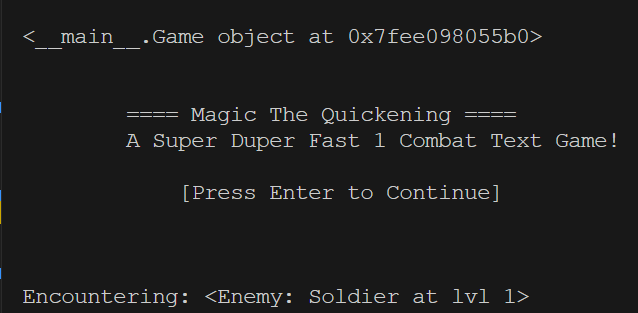

Time to add the rest of the play() logic: 

In [ ]:
    # I-c
    def play(self):
        while True:
            next_enemy = random.choice(self.enemies)
            #print(f"\nEncountering: {next_enemy}")
            #break

            # I-d
            cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")
            if cmd == "r":
                print(f"\n{self.player.name} runs away!")
            elif cmd == "a":
                print(f"\n{self.player.name} swings at {next_enemy.kind}!")

                if self.player.is_attacking(next_enemy):
                    self.enemies.remove(next_enemy)
                else:
                    print(f"{self.player.name} hides to plan the next move")
            elif cmd == "p":
                print(f"\npassing... Plan your next move!")
            else:
                print("\nPlease choose a valid option")

I disabled the break (line 6) otherwise the rest of the logic will not be executed. 

And again, because play() is now a method of Game class, it needs to reference itself. So I had to add that self before the objects player (lines 11, 13, 15, 18) and enemies (line 16) if I want to use the ones that are integral to it.  

The test run shows that the game runs as expected until I meet the condition for a game end, at which point the game just broke. This is normal because I still did not add the ending condition to the Game class.  

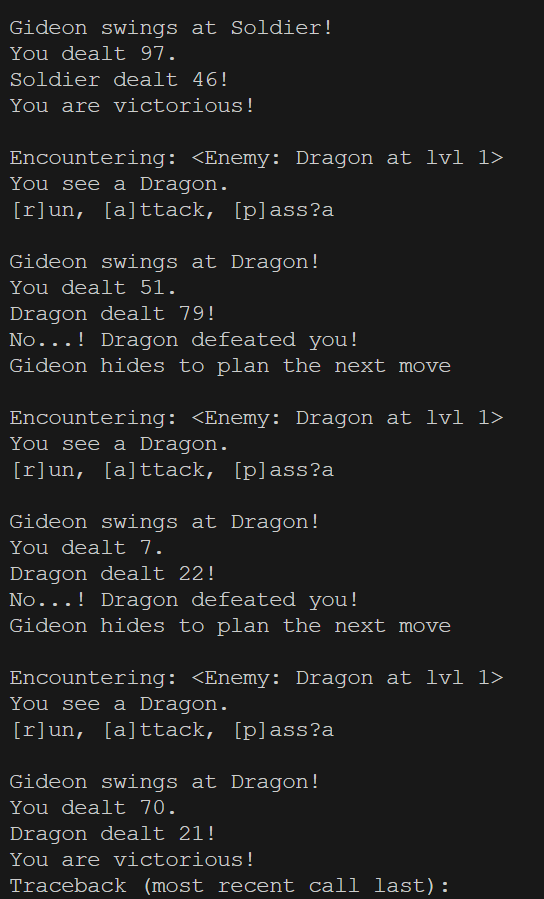

What is missing are these break lines and the asterisks bar and also the ending condition, which is using that enemies object (line 5), and that means a self is needed before it:

In [ ]:
            print()
            print("*" * 40)
            print()

            if not self.enemies:
                print("You defeated all the enemies!\n\tCONGRATULATIONS!!!")
                break

A new test run confirms that new code addition: 

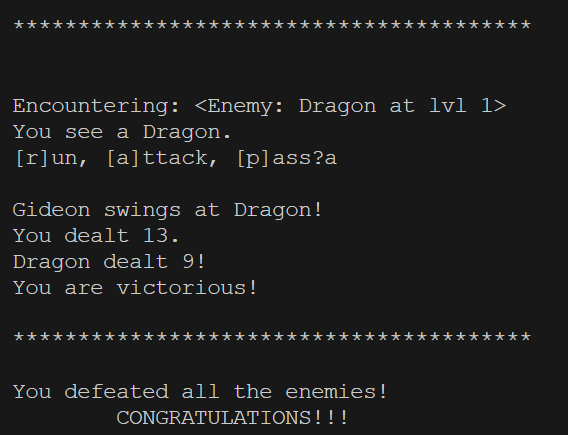

## **Clean up**: 

The game is back to what it was and it is now a whole class of its own instead of a function.  
I need to do some clean up to keep the code in game.py minimal and readable.  

The whole original play() function can now be deleted, I do not need it anymore. 

In [ ]:
# G-Ib
def play():
    ...

And the last code block is now down to this:

In [ ]:
if __name__ == "__main__":
    player = Player(name="Gideon", level=1)
    enemies = [Enemy("Dragon", 1), Enemy("Soldier", 1)]
    Game(player, enemies).main()

I am still injecting the new player and enemies list but this time instead of instantiating a game object I just run the class itself and call its main function (line 4). 

# **making it prettier**: 

Remember these 3 lines of prints? I can just refactor them into a one line function: 

In [ ]:
    # I-e
    def print_linebreaks(self):
        print()
        print("✨" * 25)
        print()

The self as an argument is not needed but it is best practice. 

I chose to go with emojis instead of a legacy looking asterisk and now 40 of those is too much so I made it 25. Of course I now need to call it where I need it. 

In [ ]:
            # I-j
            self.print_linebreaks()

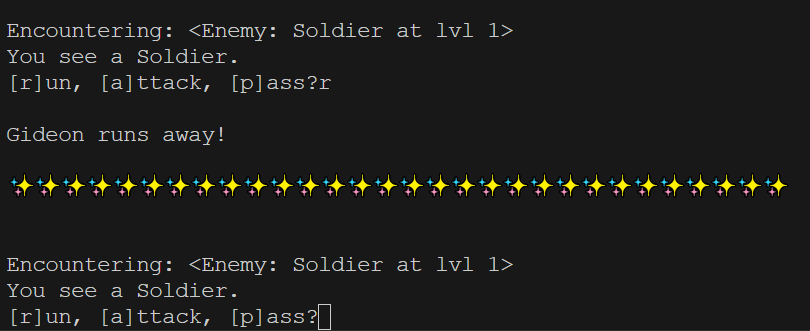

### **More emojis and Game-like slow process**:

I want to continue on the emoji path and add more of them. 
I let you look at the play() function to see all the changes I brought, or you could just run the game to see them all.  

Also, to add a legacy game flavor I want to add code that mimic how old PCs were thinking for half a second before they printed out or ran anything. 

I want it at:
- the beginning before and after I press enter
- whenever an action is chosen: so for run, attack, pass
- when any other key is typed
- before any encounter is randomly chosen
- and many other places in the code

For that I need to import the module time and use its slep() method:

In [ ]:
    # I-b
    def print_intro(self):
        print(
            """
        ==== Magic The Quickening ====
        A Super Duper Fast 1 Combat Text Game!
        """
        )
        
        time.sleep(1)
        print(f"\n\t[Press Enter to Continue]\n\n")
        input()
        
        # J-a
        time.sleep(0.5)

Here I split the print into 2 prints, the second print (line 11) is delayed by 1 second and I added a 1/2 second delay after pressing enter (line 15).

I added these delays wherever I found them great to have, and I decided thanks to many test runs. 

I also added a small line that **clears the terminal** when the game is started and when it is ended:

In [ ]:
# k-a
os.system("cls" if os.name == "nt" else "clear")
break

# **More Refactoring: abstraction**: 

After I took some time to look back at my code I noticed that many parts of it is repeating. And that is a call for refactoring. 

Being able to abstract functions, meaning naming them so that they make sense for what they do(and you will understand in a moment) is important. 

In my actors.py file I see that the `__repr__` method is repeated several times over in the Player and Enemy classes.  
So I need to come up with a name that could wrap these 2 concepts of Player and Enemy. What about "Actor"? 

Now, this could seem too vague to you, but it still makes sense, because an actor is someone who can be anyone, right? So it could be a Player and/or an Enemy. Some of you may prefer the term "Character" as in a book's character. For me they both work and Character is actually the one I prefer (because it fits better to a fictional simple game like ours here) so I will go with it. 

Let's code it:


In [ ]:
# Z-a
class Character:
    def __init__(self, name, level) -> None:
        self.name = name
        self.level = level

    def __repr__(self):
        return f"<Character: {self.name}, level: {self.level}>"

    def get_attack_power(self):
        return randint(1, 100) * self.level

    def attacks(self, target):
        raise NotImplementedError()

Just like the class Player, Character has:
- name
- level  
These are required and fundamental to the game. 

I moved the `__repr__` method in there too and changed it accordingly. 
Same for the `get_attack_power()` method.

Now for the new method attacks(). Because I am taking a higher view on my classes (I am trying to wrap Player and Enemy into one class), I need to think about what that new better class needs to be doing in my game.  
The `get_attack_power()` method is randomizing damages. But what if I want to customize that attack action? This is why I implemented that into a method `attacks()`. 

In the last line (14) the error raise method is there to notify myself and my future self that the method is there in the class but I need to specify it to each object instantiated (meaning, an Ogre character needs to have its own specific attacks method).  

With all of that, the corresponding code in the Player class is now redundant because I can make the Player class inherit from the Character class, meaning Player class will include all the code I just moved and added to the Character class.  
So I am removing all the code (from actors.py) that is here under line 2: 

In [ ]:
# I
class Player:
    def __init__(self, name, level) -> None:
        self.name = name
        self.level = level

    # adding a print-out function
    def __repr__(self) -> str:
        return "<Player: {} at Level {}>".format(self.name, self.level)

    # I-1
    def get_attack_power(self):
        return randint(1, 100) * self.level

And here I am making the Player class inherit from that Character class: 

In [ ]:
# I
class Player(Character):

    # I-2
    ...

And a test run shows that the game is still working as it was before refactoring. Before that I just want to disable the clearing terminal code line I added previously in game.py so that I can see what happened in my game.

In [ ]:
                # k-a
                #os.system("cls" if os.name == "nt" else "clear")

Indeed, the game runs as intended: 

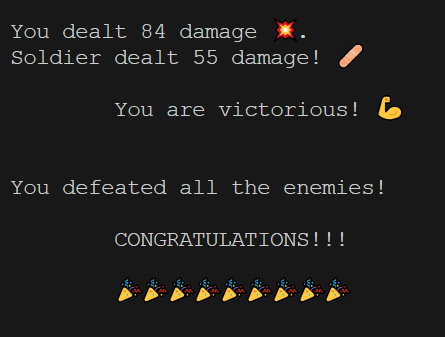

## Inheriting with super():

For the Enemy class I need to make inherit the Character class too but before I also need to take that higher stance and view to consider again what I need it to do. 

Instead of just a kind, I want each Enemy to have its own name, on top of a kind. This is what I added in the code below, line 3:

In [ ]:
# II
class Enemy(Character):
    def __init__(self, name, level, kind) -> None:

Now Enemy has access to everything Characters has: name, level, `__repr__` etc.  
And to activate these I just need this line of code (line 4): 

In [ ]:
# II
class Enemy(Character):
    def __init__(self, name, level, kind) -> None:
        super().__init__(name, level)
        self.kind = kind

The line 5 was kept because I still want Enemy to have a kind.  

So I can now remove the 2 methods `__repr__` and `get_attack_power()`.

Before I test run I know that my Enemy class changed, I added to it a name and kept the kind. This means that now the objects I instantiated in the game.py: player and enemies, are not correct anymore. I need to modify them accordingly. 

In [ ]:
if __name__ == "__main__":
    player = Player(name="Gideon", level=1)
    enemies = [
        Enemy("Nicol Bolas", 1, "Dragon"), 
        Enemy("Benalish", 1, "Soldier")
        ]
    Game(player, enemies).main()

I saved and test ran the game and nothing broke: 

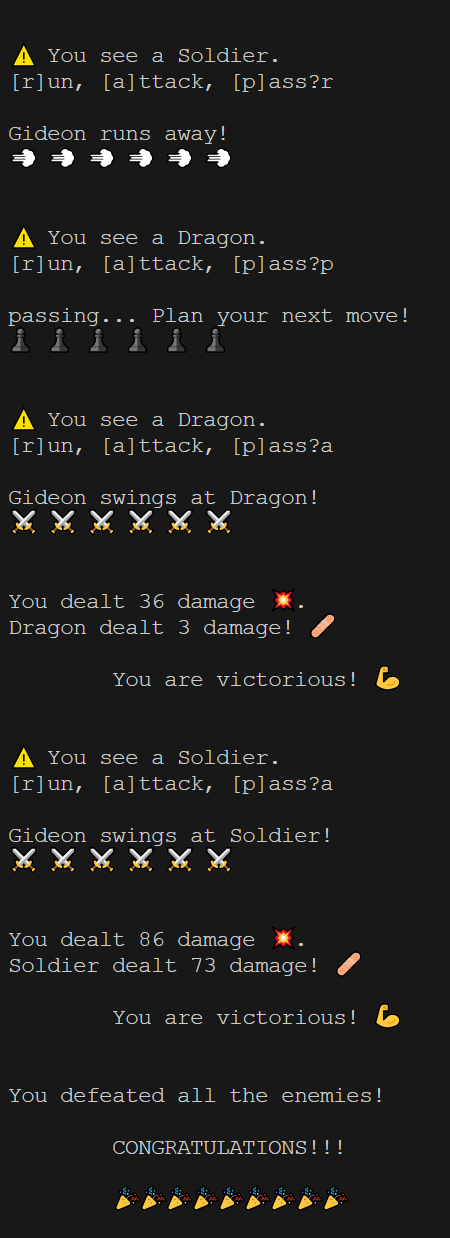

# **Deeper inheritance**:

I have an Enemy and a Player class that inherited from the Character class.  
Continuing with adding different kind of enemies I can now make a new class for each specific kind of enemy that I want, say Dragon, Ogre, etc.  

In the case of the Ogre, what do I want it to have that is special? To be even more inclusive in my decision, let's add a size attribute to every enemy.  
That size will have what impact? It will impact the damage inflicted.  

## **New inheriting Classes**:
So I am overriding the `get_attack_power()` method to include that size argument. 

In [ ]:
# II-1
class Dragon(Enemy):
    def __init__(self, name, level, size) -> None:
        super().__init__(name, level, 'Dragon')
        self.size = size
        
    def get_attack_power(self):
        return randint(20, 50) * (self.size * self.level)

The new class Dragon inherits from the class Enemy (which inherited from the class Character). 
A Dragon has to have:
- a name,  
- a level
- and a size

By using the super() on the `__init__` and assigning 'Dragon' to its 'kind' argument I essentially made it so **every instance of this class will be of kind 'Dragon'**, and that is what I want. 

Then I added the size in line 5. 

The damage is then updated by multiplying the size with the level.  
Why **multiply**? I **test ra**n with an addition and the increase is not big enough to really make a difference. Multiply does it though.  
So this means that level 1 characters do not have any increase in damage (1 * 1 is till = 1) but this **doubles** at level 2 and **triples** at 3 etc.  

Of course I am still applying a randint and a different range depending on the enemy to make it even more interesting and less predictable.  

Here for Dragons, the **upper-bound being 50** I essentially limited the **max damage** to 50 at LVL 1, 100 at 2, 150 at 3 and so on. Probability-wise this **plays in favor of the user** and helps towards faster wins. 
Similarly, the lower-bound being 20 makes its minimum damage higher that if it was just 1. This adds to the feeling that Dragons are beefier than other creatures. 

I do the same for soldiers and create a class for it:

In [ ]:
class Soldier(Enemy):
    def __init__(self, name, level, size) -> None:
        super().__init__(name, level, "Soldier")
        self.size = size

    def get_attack_power(self):
        return randint(1, 35) * (self.size * self.level)

Note that the only differences are:
- the kind of course
- the upper-bound of 35
- and the minimum of 1 in the randint arguments

A soldier is way less strong than a Dragon, giving it these lower upper-bound and lower-bound add to that characteristic of a weaker creature. 

## **Update the code accordingly**:

Adding a new class is great, using it is even greater. To use it in the game.py file, I need that file to have access to that new class, just like it had at the very beginning with the classes Enemy and Player.  

So I am importing Dragon too:

In [ ]:
from actors import Dragon, Soldier, Enemy, Player  # import A

And now that it is available to game.py I can update my enemies list, it needs the new size argument for each enemy:

In [ ]:
if __name__ == "__main__":
    player = Player(name="Gideon", level=1)
    enemies = [Dragon("Nicol Bolas", 1, 3), Soldier("Benalish", 1, 3)]
    Game(player, enemies).main()

Line 3 I applied the arguments in the order in which they appear in my new classes of Dragon and Soldier. 

Note that I made them of size 3, so their damage should be 3 times as big. 

A test run shows a damage of 114 for the dragon, confirming the new damage is working:

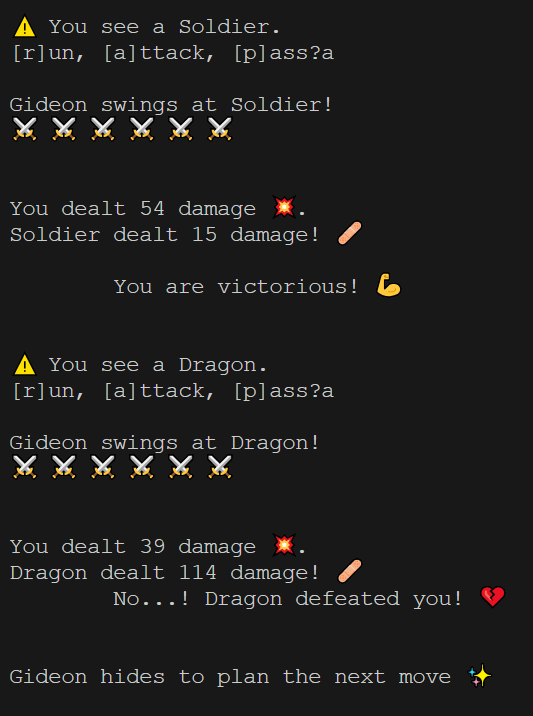

# **Extending the game to Version 2**:

Let's assume I gave the game to many people who played it and I received a **lot of feedback**. 

People seems to like the randomness of the encounters, so I'll keep that. 
But they do **not see difference** between the **run and pass** action, so I should at least drop one of them. 

They also said that the **game is too easy**, they never really have a chance to lose.  
For that I will add logic so that each encounter is not just one big attack swing followed by a winner/loser. Instead, **Health Points will be implemented** and they will condition the win or loss once HP are at 0. Very classic, I Did not reinvent the wheel, most players are expecting this in a combat game. 

**IMPORTANT**:  

I will not modify the files actors.py and game.py, instead I created a `version2` folder in the `./app` folder where I copied them over.  
So be sure to create/use them from now. 
And also, when you test run, change the path of the command to the new path (version2) of the copy of the game.py file. 

## **Where to put Health Points?**:

Keeping in mind that we have **2 levels of inheritance** starting from Character class, I know for usre that anything I add to Character will be added to the other inherited (children) classes of Enemy and Player, which are the classes that I want to add that HP to.  

So HP has to go in the Character class, in `./version2/actors.py`.

In [ ]:
# Z-a
class Character:
    def __init__(self, name, level, hp) -> None:
        self.name = name
        self.level = level
        self.hp = 120 * self.level

    def __repr__(self):
        return f"<Character: {self.name}, level: {self.level}>"
    
    def is_alive(self):
        return self.hp > 0

HP is added at line 6. I chose the number 120 as a base because the damage threshold of enemies has a max upper-bound of 100, so half of the time, damage will be 50 or lower, so with 120 the player can play through, most probably, a few rounds or encounters, with a rare minimum of 2 rounds of attacks. 

Line 11 and 12 is where I added the `is_alive()` method. It makes it so I can use to determine in the game a win or loss, it is my condition: 
- if True, then it is alive, 
- if False it is dead
